# **Preparación Del Entorno**

In [1]:
# Importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# Silenciar warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Leer credenciales de Kaggle en este proyecto con bash
import os
os.environ['KAGGLE_USERNAME'] = 'jessdavidsilvarangel'
os.environ['KAGGLE_KEY'] = '40618077aff6def09f598a1fee13e874'

In [ ]:
# Descargar dataset de Kaggle
!kaggle datasets download erdemtaha/cancer-data

Dataset URL: https://www.kaggle.com/datasets/erdemtaha/cancer-data
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/48.6k [00:00<?, ?B/s]
100%|██████████| 48.6k/48.6k [00:00<00:00, 967kB/s]


In [ ]:
# Descomprimir archivo con zipfile
import zipfile
with zipfile.ZipFile('\cancer-data.zip', 'r') as zip_ref:
    zip_ref.extractall('cancer-data')

# **Análisis Exploratorio de Datos (EDA)**

In [2]:
# Leer dataset
df = pd.read_csv('cancer-data/Cancer_Data.csv')

# Mostrar las primeras 10 filas del dataset
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
# Mostrar información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Mostrar estadísticas del dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# Estadísticas descriptivas de las variables texture_worst	perimeter_worst	area_worst	smoothness_worst	compactness_worst
df[['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst']].describe().style.background_gradient(cmap='viridis')

,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,25.677223,107.261213,880.583128,0.132369,0.254265
std,6.146258,33.602542,569.356993,0.022832,0.157336
min,12.020000,50.410000,185.200000,0.071170,0.027290
25%,21.080000,84.110000,515.300000,0.116600,0.147200
50%,25.410000,97.660000,686.500000,0.131300,0.211900
75%,29.720000,125.400000,1084.000000,0.146000,0.339100
max,49.540000,251.200000,4254.000000,0.222600,1.058000


In [9]:
# Estadísticas descripivas de las variables concavity_worst	symmetry_worst	fractal_dimension_worst
df[['concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']].describe().style.background_gradient(cmap='viridis')

,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000
mean,0.272188,0.290076,0.083946
std,0.208624,0.061867,0.018061
min,0.000000,0.156500,0.055040
25%,0.114500,0.250400,0.071460
50%,0.226700,0.282200,0.080040
75%,0.382900,0.317900,0.092080
max,1.252000,0.663800,0.207500


In [10]:
# Estadísticas descriptivas de radius_mean	texture_mean	perimeter_mean	area_mean	smoothness_mean	compactness_mean	concavity_mean
df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']].describe().style.background_gradient(cmap='viridis')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800


In [15]:
# Ver los cuartiles de algunas variables númericas
df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']].quantile([0.25, 0.5, 0.75]).style.background_gradient(cmap='viridis')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0.250000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560
0.500000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540
0.750000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700


In [ ]:
# Mostrar estadisticas especificas de la columna 'diagnosis'
df['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [ ]:
# Mostrar estadisticas completas
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [ ]:
# Mostrar cantidad de valores nulos por columna
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
# Eliminar columna 'Unnamed: 32'
df = df.drop(['Unnamed: 32'], axis=1)

In [ ]:
# Ver si se eliminó la columna
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Mostrar cantidad de valores NaN por columna
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Mostrar cantidad de valores duplicados
df.duplicated().sum()

0

In [32]:
# Importar la librería fm de matplotlib
from matplotlib import font_manager as fm

# Configurar el estilo de los gráficos ggplot
plt.style.use('ggplot')

# Ruta a la fuente personalizada
font_path = 'KellySlab-Regular.ttf'  # Rura a la fuente personalizada

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

In [ ]:
# Verificar cantidad valores de la columna 'diagnosis'
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# Verificar cantidad de valores unicos de la columna 'diagnosis'
df['diagnosis'].nunique()

2

In [ ]:
# Listar las columnas del dataset
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
# Eliminar la columna 'id'
df = df.drop(['id'], axis=1)

# Verificar si se eliminó la columna 'id'
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Convertir la columna 'diagnosis' a valores numéricos
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Verificar si se convirtió la columna 'diagnosis' a valores numéricos
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


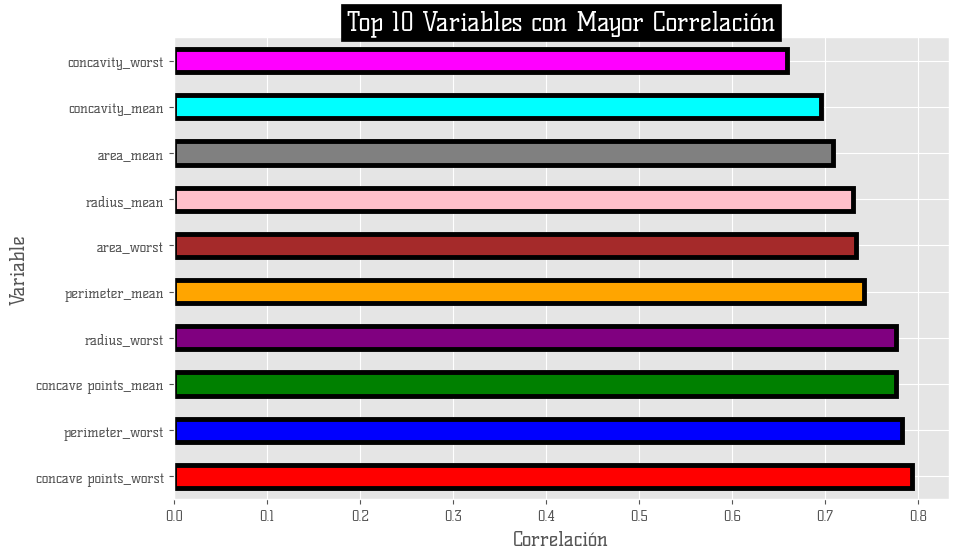

In [22]:
# Calcular la correlación entre las variables frente a la variable 'diagnosis' y ordenarlas de mayor a menor
correlation = df.corr()['diagnosis'].sort_values(ascending=False)
correlation = correlation.drop('diagnosis')

# Mostrar las 10 variables con mayor correlación en grafico de barras horizontal
plt.figure(figsize=(10, 6))
correlation.head(10).plot(kind='barh', linewidth=3.5, edgecolor='black', color=['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Top 10 Variables con Mayor Correlación', fontsize=18, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.show()

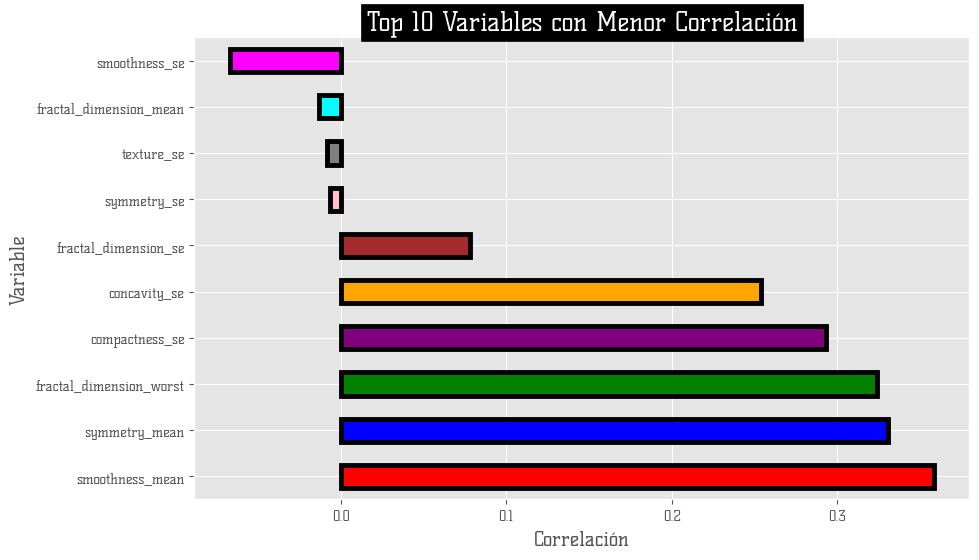

In [24]:
# Mostrar las 10 variables con menor correlación en grafico de barras horizontal
plt.figure(figsize=(10, 6))
correlation.tail(10).plot(kind='barh', linewidth=3.5, edgecolor='black', color=['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Top 10 Variables con Menor Correlación', fontsize=18, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.show()

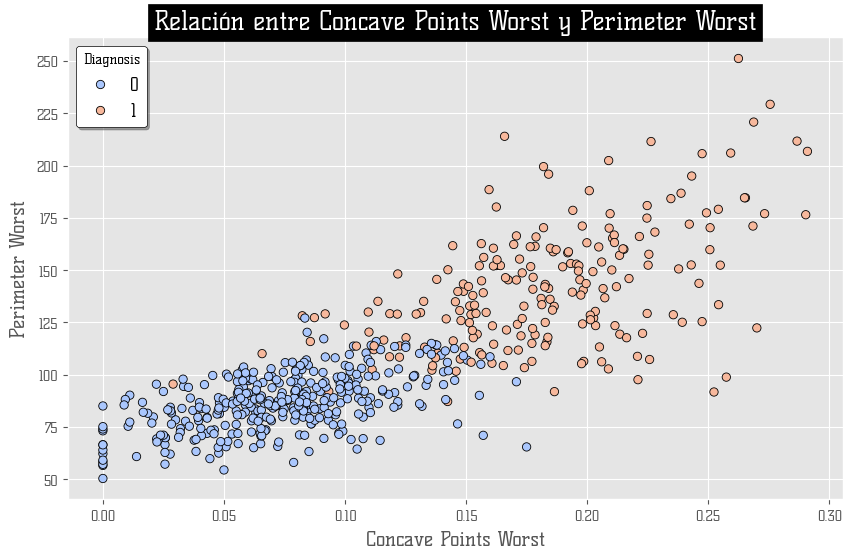

In [27]:
# Gráfico de dispersión de las variables con mayor correlación con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='concave points_worst', y='perimeter_worst', hue='diagnosis', data=df, palette='coolwarm', edgecolor='black', linewidth=0.6)
plt.title('Relación entre Concave Points Worst y Perimeter Worst', fontsize=18, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Concave Points Worst', fontsize=14)
plt.ylabel('Perimeter Worst', fontsize=14)
plt.legend(title='Diagnosis', fontsize=12, facecolor='white', edgecolor='black', shadow=True)
plt.show()

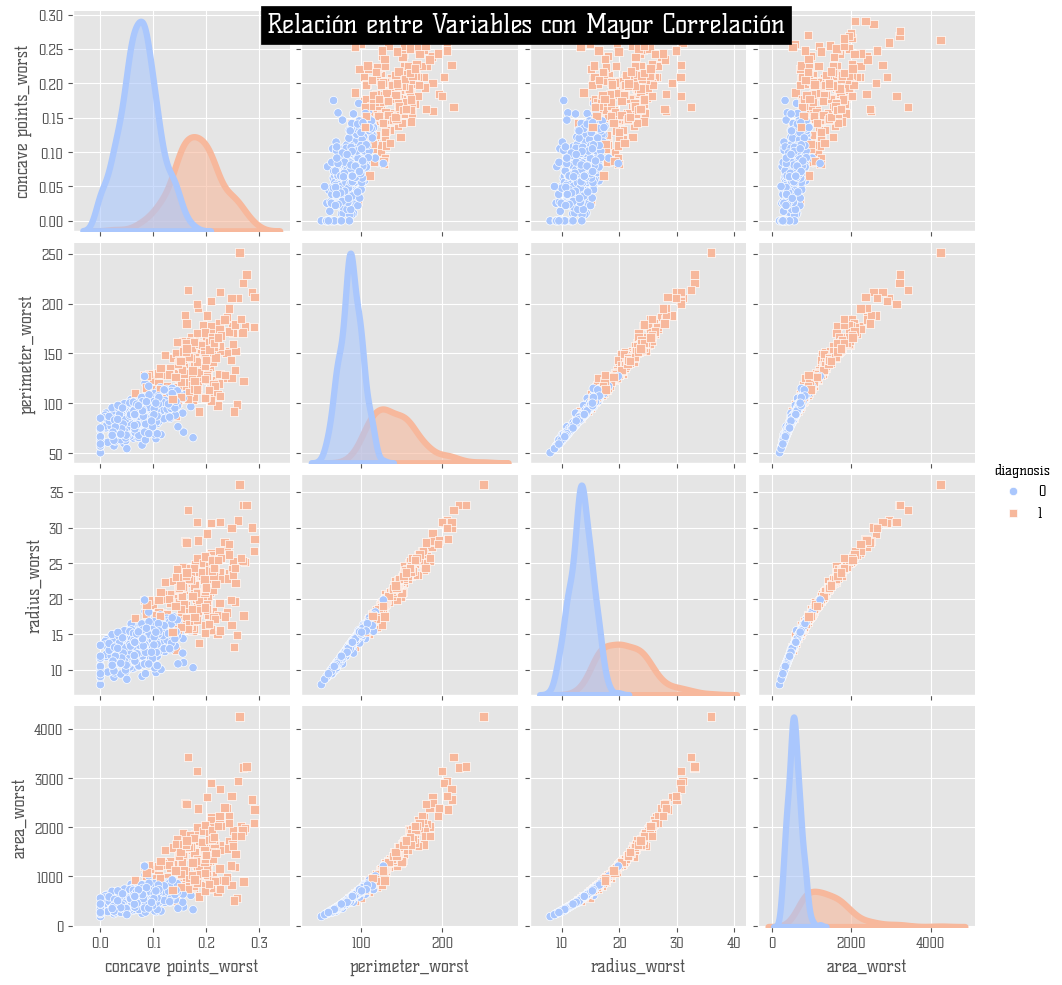

In [32]:
# Resumen gráfico pairplot de las variables con mayor correlación con seaborn
sns.pairplot(df[['concave points_worst', 'perimeter_worst', 'radius_worst', 'area_worst', 'diagnosis']], hue='diagnosis', palette='coolwarm', markers=['o', 's'],  diag_kind='kde', diag_kws={'linewidth': 4.5, 'alpha': 0.6,})
plt.suptitle('Relación entre Variables con Mayor Correlación', fontsize=18, fontweight='bold', backgroundcolor='black', color='white')
plt.show()

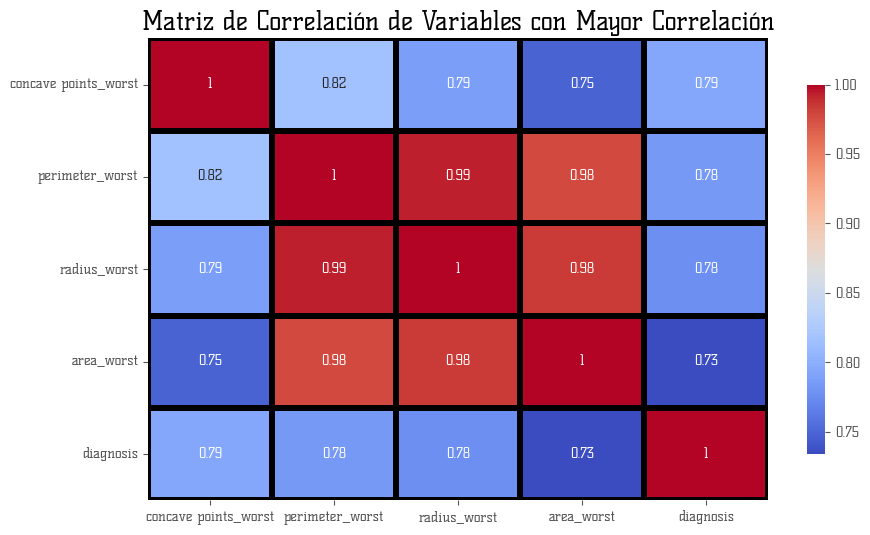

In [33]:
# Calcular la matriz de correlación de las variables con mayor correlación
correlation_matrix = df[['concave points_worst', 'perimeter_worst', 'radius_worst', 'area_worst', 'diagnosis']].corr()

# Matriz de correlación de las variables con mayor correlación con matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=4.2, linecolor='black', cbar_kws={'shrink': .8})
plt.title('Matriz de Correlación de Variables con Mayor Correlación', fontsize=18)
plt.show()

# **Modelado y Entrenamiento**

In [7]:
# Dividir el dataset en variables dependientes e independientes
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Escalar las variables independientes
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Entrenar un modelo de regresión logística con busqueda de hiperparámetros con GridSearchCV y metricas avanzadas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear un modelo de regresión logística
model = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2')

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
# Predecir los valores de prueba
y_pred = model.predict(X_test)

In [10]:
# Imprimir precisión
print('Precisión:', accuracy_score(y_test, y_pred))

# Imprimir reporte de clasificación
print('Reporte de Clasificación:' '\n', classification_report(y_test, y_pred))

Precisión: 0.9912280701754386
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



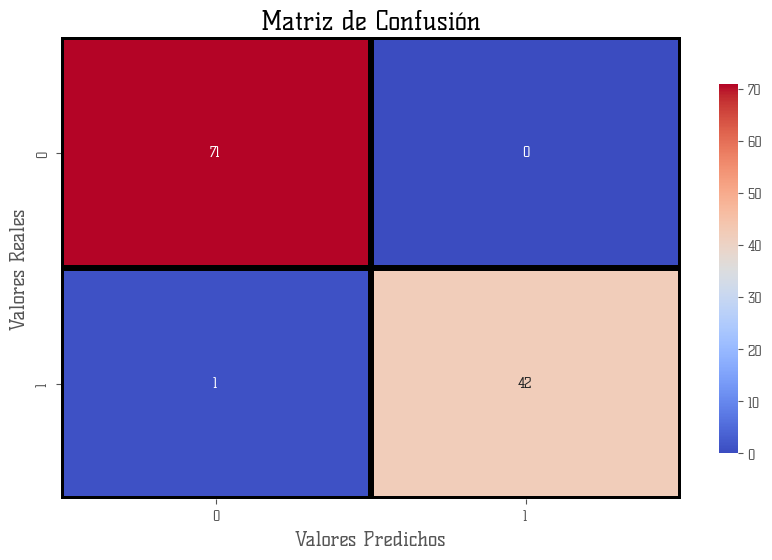

In [11]:
# Imprimir matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', linewidths=4.2, linecolor='black', cbar_kws={'shrink': .8})
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Valores Predichos', fontsize=14)
plt.ylabel('Valores Reales', fontsize=14)
plt.show()

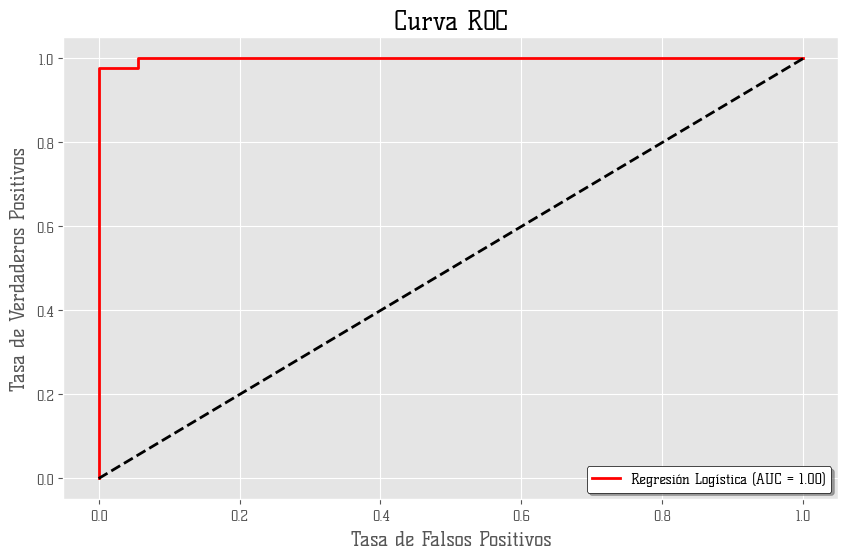

In [14]:
# Gráfico de AUC ROC
# Calcular probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular AUC ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

# Gráfico de AUC ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='Regresión Logística (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.title('Curva ROC', fontsize=18)
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.legend(loc='best', facecolor='white', edgecolor='black', shadow=True)
plt.show()



# **Otros Modelos**

In [15]:
# Importar librerias para otros modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [20]:

# Crear modelos en una lista de diccionarios separados
models = [
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'SVM', 'model': SVC()},
    {'name': 'KNN', 'model': KNeighborsClassifier()},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()}
]

# Entrenar y evaluar cada modelo
for model_dict in models:
    model_name = model_dict['name']
    model = model_dict['model']
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir los valores de X_test
    y_pred = model.predict(X_test)
    
    # Imprimir precisión del modelo
    print(f'{model_name} Precisión:', accuracy_score(y_test, y_pred))
    
    # Imprimir reporte de clasificación del modelo
    print(f'{model_name} Reporte de Clasificación:\n', classification_report(y_test, y_pred))
    
    # Imprimir divisores
    print('\n', '-'*100, '\n')

Random Forest Precisión: 0.9649122807017544
Random Forest Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


 ---------------------------------------------------------------------------------------------------- 

SVM Precisión: 0.9736842105263158
SVM Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 -----------------------------------------------------------------------------------------

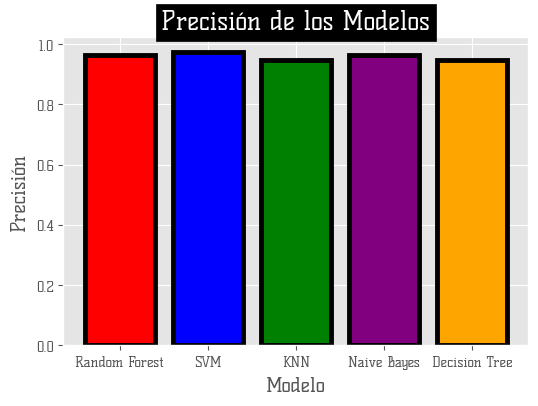

In [31]:
# Gráfico de barras sobre la precisión de los modelos
models_name = [model_dict['name'] for model_dict in models]
models_accuracy = [accuracy_score(y_test, model_dict['model'].predict(X_test)) for model_dict in models]

plt.figure(figsize=(6, 4))
plt.bar(models_name, models_accuracy, color=['red', 'blue', 'green', 'purple', 'orange'], linewidth=3.5, edgecolor='black')
plt.title('Precisión de los Modelos', fontsize=18, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Precisión', fontsize=14)
plt.show()

In [29]:
# Alcanzar la precisión más alta en el modelo de Random Forest

# Hiperparámetros del modelo de Random Forest
# n_estimators: Número de árboles en el bosque
# criterion: Función para medir la calidad de una división
# max_depth: Profundidad máxima del árbol
# min_samples_split: Número mínimo de muestras requeridas para dividir un nodo
# min_samples_leaf: Número mínimo de muestras requeridas en cada hoja
# max_features: Número de características a considerar en cada división

# Ajustar hiperparámetros con un diccionario de parámetros
params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear un modelo de Random Forest
model = RandomForestClassifier()

# Crear un modelo de GridSearchCV
grid = GridSearchCV(model, params, cv=5)

# Entrenar el modelo
grid.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print('Mejores Hiperparámetros:', grid.best_params_)

# Predecir los valores de prueba
y_pred = grid.predict(X_test)

# Imprimir precisión
print('Precisión:', accuracy_score(y_test, y_pred))

# Imprimir reporte de clasificación
print('Reporte de Clasificación:' '\n', classification_report(y_test, y_pred))

Mejores Hiperparámetros: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Precisión: 0.9649122807017544
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [30]:
# Predecir con los mejores hiperparámetros
model = RandomForestClassifier(**grid.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Imprimir precisión
print('Precisión:', accuracy_score(y_test, y_pred))

# Imprimir reporte de clasificación
print('Reporte de Clasificación:' '\n', classification_report(y_test, y_pred))

Precisión: 0.9649122807017544
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Predicciones**

In [34]:
# Llamar al modelo de regresión logística
model = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2')

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model.predict(X_test)

# Imprimir precisión
print('Precisión:', accuracy_score(y_test, y_pred))

# Imprimir reporte de clasificación
print('Reporte de Clasificación:' '\n', classification_report(y_test, y_pred))

Precisión: 0.9912280701754386
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [36]:
# Predecir probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la precisión media
average_precision = average_precision_score(y_test, y_pred_prob)

# Calcular la curva de precisión y recuperación
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva de precisión y recuperación
area = auc(recall, precision)

# Imprimir lo anterior
print('Precisión Media:', average_precision)
print('Área Bajo la Curva:', area)

Precisión Media: 0.9980207817911926
Área Bajo la Curva: 0.9979992685497925


In [37]:
# Imprimir coeficientes del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
print('Número de Iteraciones:', model.n_iter_)
print('Clases:', model.classes_)
print('Probabilidades:', model.predict_proba(X_test))

Coeficientes: [[ 0.36044121  0.40675452  0.35008039  0.37486885  0.12897777 -0.01581335
   0.37874991  0.47233767  0.02278222 -0.16343834  0.49099914 -0.02592468
   0.34814525  0.39757611  0.08575126 -0.26581531 -0.07051382  0.07734165
  -0.15154096 -0.24836043  0.49386445  0.58345622  0.43828209  0.47181151
   0.38489793  0.14696759  0.40430553  0.4502764   0.46989991  0.12152636]]
Intercepto: [-0.33999712]
Número de Iteraciones: [7]
Clases: [0 1]
Probabilidades: [[8.10510585e-01 1.89489415e-01]
 [1.83245316e-03 9.98167547e-01]
 [4.20190079e-02 9.57980992e-01]
 [9.81165878e-01 1.88341216e-02]
 [9.96158033e-01 3.84196704e-03]
 [5.43211959e-07 9.99999457e-01]
 [7.27792547e-06 9.99992722e-01]
 [1.31098743e-01 8.68901257e-01]
 [5.60622376e-01 4.39377624e-01]
 [9.87004226e-01 1.29957739e-02]
 [8.86361144e-01 1.13638856e-01]
 [9.08365533e-02 9.09163447e-01]
 [9.55533282e-01 4.44667175e-02]
 [1.84398604e-01 8.15601396e-01]
 [9.86553520e-01 1.34464801e-02]
 [5.24056391e-03 9.94759436e-01]
 [9

## **Maligno**

In [41]:
# Crear un dataframe con los datos de un paciente con cáncer
data = {
    'radius_mean': [20.57],
    'texture_mean': [17.77],
    'perimeter_mean': [132.9],
    'area_mean': [1326],
    'smoothness_mean': [0.08474],
    'compactness_mean': [0.07864],
    'concavity_mean': [0.0869],
    'concave points_mean': [0.07017],
    'symmetry_mean': [0.1812],
    'fractal_dimension_mean': [0.05667],
    'radius_se': [0.5435],
    'texture_se': [0.7339],
    'perimeter_se': [3.398],
    'area_se': [74.08],
    'smoothness_se': [0.005225],
    'compactness_se': [0.01308],
    'concavity_se': [0.0186],
    'concave points_se': [0.0134],
    'symmetry_se': [0.01389],
    'fractal_dimension_se': [0.003532],
    'radius_worst': [24.99],
    'texture_worst': [23.41],
    'perimeter_worst': [158.8],
    'area_worst': [1956],
    'smoothness_worst': [0.1238],
    'compactness_worst': [0.1866],
    'concavity_worst': [0.2416],
    'concave points_worst': [0.186],
    'symmetry_worst': [0.275],
    'fractal_dimension_worst': [0.08902]
}

# Convertir el diccionario en un dataframe
data = pd.DataFrame(data)

# Ver el dataframe
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902


In [42]:
# Escalar los datos
data = scaler.transform(data)

# Ver los datos escalados
data

array([[ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+00,
        -3.69203222e-01,  1.53512599e+00,  1.89048899e+00,
        -3.75611957e-01, -4.30444219e-01, -1.46748968e-01,
         1.08708430e+00, -2.43889668e-01,  2.81189987e-01]])

In [51]:
# Predecir si el paciente tiene cáncer
prediction = model.predict(data)
prediction = 'Maligno' if prediction[0] == 1 else 'Benigno'

# Presentación de resultados de forma elegante
# Imprimir título
print('\033[1m' + 'PREDICCION DEL TIPO DE TUMOR DE UN PACIENTE' + '\033[0m')
# Imprimir divisores
print('------------------------------------------------')

# Imprimir la predicción
print('El paciente tiene un tumor:', prediction)

# Calcular la probabilidad de la predicción
probability = model.predict_proba(data)[0][1] * 100
print(f'Con una probabilidad del {probability:.2f}%')

# Imprimir divisores
print('------------------------------------------------')

PREDICCION DEL TIPO DE TUMOR DE UN PACIENTE
------------------------------------------------
El paciente tiene un tumor: Maligno
Con una probabilidad del 99.42%
------------------------------------------------


## **Benigno** 

In [52]:
# Crear un dataframe con los datos de un paciente con tumor benigno
data = {
    'radius_mean': [6.981],
    'texture_mean': [13.43],
    'perimeter_mean': [43.79],
    'area_mean': [143.5],
    'smoothness_mean': [0.117],
    'compactness_mean': [0.07568],
    'concavity_mean': [0.0],
    'concave points_mean': [0.0],
    'symmetry_mean': [0.1932],
    'fractal_dimension_mean': [0.064],
    'radius_se': [0.2701],
    'texture_se': [1.081],
    'perimeter_se': [1.709],
    'area_se': [17.99],
    'smoothness_se': [0.008007],
    'compactness_se': [0.01124],
    'concavity_se': [0.0],
    'concave points_se': [0.0],
    'symmetry_se': [0.277],
    'fractal_dimension_se': [0.08756],
    'radius_worst': [7.93],
    'texture_worst': [19.54],
    'perimeter_worst': [50.41],
    'area_worst': [185.2],
    'smoothness_worst': [0.1584],
    'compactness_worst': [0.1202],
    'concavity_worst': [0.0],
    'concave points_worst': [0.0],
    'symmetry_worst': [0.2932],
    'fractal_dimension_worst': [0.09382]
}

# Convertir el diccionario en un dataframe
data = pd.DataFrame(data)

# Ver el dataframe
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6.981,13.43,43.79,143.5,0.117,0.07568,0.0,0.0,0.1932,0.064,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.0,0.0,0.2932,0.09382


In [53]:
# Escalar los datos
data = scaler.transform(data)

# Ver los datos escalados
data

array([[-2.0296483 , -1.36357954, -1.98450403, -1.45444309,  1.46883471,
        -0.54316805, -1.11487284, -1.26181958,  0.43950557,  0.17045132,
        -0.48750342, -0.24648484, -0.57277974, -0.49167395,  0.32202009,
        -0.79576302, -1.05750068, -1.91344745, 31.05151469, 31.68426003,
        -1.72690052, -0.99940869, -1.69336103, -1.22242284,  1.14110988,
        -0.85284099, -1.30583065, -1.74506282,  0.0505464 ,  0.54718591]])

In [54]:
# Predecir si el paciente tiene cáncer
prediction = model.predict(data)
prediction = 'Maligno' if prediction[0] == 1 else 'Benigno'

# Presentación de resultados de forma elegante
# Imprimir título
print('\033[1m' + 'PREDICCION DEL TIPO DE TUMOR DE UN PACIENTE' + '\033[0m')
# Imprimir divisores
print('------------------------------------------------')

# Imprimir la predicción
print('El paciente tiene un tumor:', prediction)

# Calcular la probabilidad de la predicción
probability = model.predict_proba(data)[0][1] * 100

print(f'Con una probabilidad del {probability:.2f}%')

# Imprimir divisores
print('------------------------------------------------')

PREDICCION DEL TIPO DE TUMOR DE UN PACIENTE
------------------------------------------------
El paciente tiene un tumor: Benigno
Con una probabilidad del 0.00%
------------------------------------------------


In [55]:
# Guardar el modelo y el escalador
import joblib

# Guardar el modelo
joblib.dump(model, 'TTC-99_Model.pkl')

# Guardar el escalador
joblib.dump(scaler, 'TTC-99_Scaler.pkl')

['TTC-99_Scaler.pkl']